In [1]:
%matplotlib inline
from pylab import *
import cv2

In [2]:
rcParams['figure.figsize'] = 10, 10

In [3]:
from dataset import load_image

In [4]:
import torch

In [5]:
from utils import variable

In [6]:
from generate_masks import get_model

In [7]:
from torchvision.transforms import ToTensor, Normalize, Compose

In [8]:
img_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [9]:
def mask_overlay(image, mask, color=(0, 255, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.uint8)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0    
    img[ind] = weighted_sum[ind]    
    return img

In [10]:
model_path = 'data/models/UNet11/model_0.pt'
model = get_model(model_path, model_type='UNet11')

In [11]:
img_file_name = 'data/train/angyodysplasia/images/1099.jpg'
gt_file_name = 'data/train/angyodysplasia/masks/1099_a.jpg'

In [12]:
img = load_image(img_file_name)
gt = cv2.imread(gt_file_name, 0) > 0

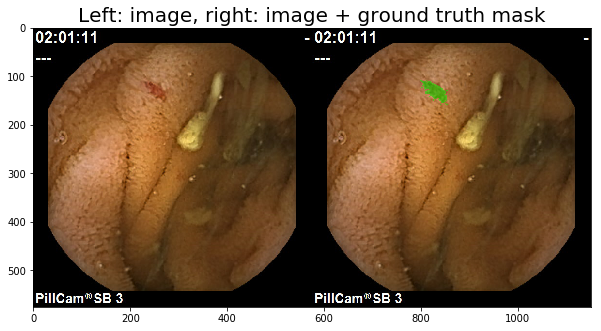

In [13]:
title("Left: image, right: image + ground truth mask", fontsize=20)

imshow(np.hstack([img, mask_overlay(img, gt)]))

In [14]:
img_transform = Compose([
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [15]:
input_img = torch.unsqueeze(variable(img_transform(img), volatile=True), dim=0)

In [16]:
mask = model(input_img)

In [17]:
mask_array = mask.data[0].cpu().numpy()[0]

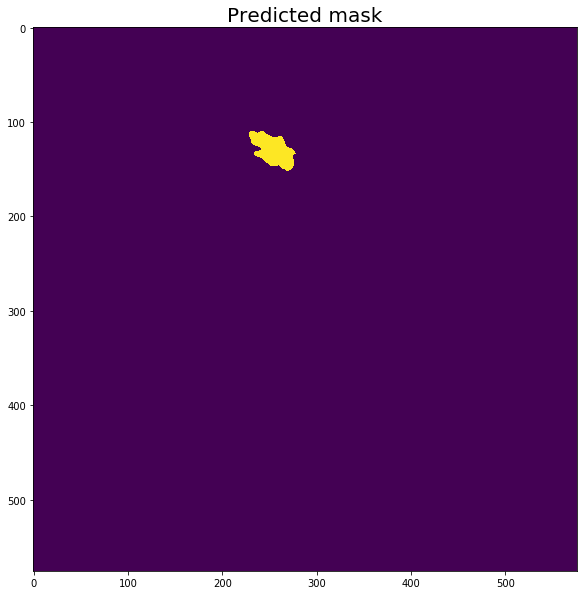

In [18]:
title('Predicted mask', fontsize=20)
imshow(mask_array > 0)

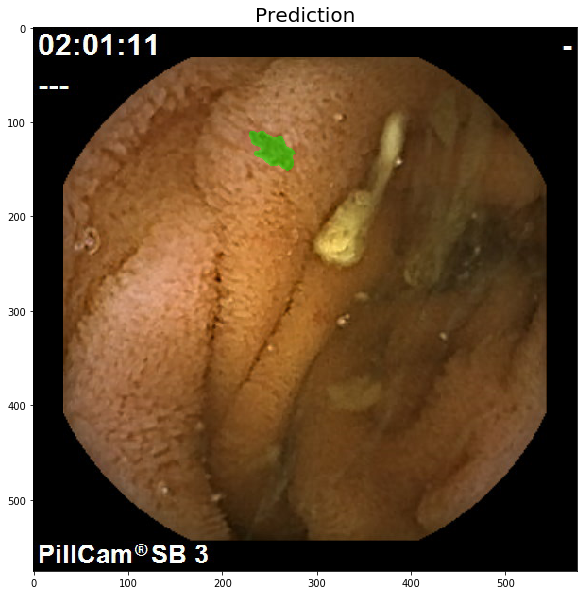

In [19]:
title('Prediction', fontsize=20)
imshow(mask_overlay(img, (mask_array > 0).astype(np.uint8)))